

> Indented block



In [155]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [156]:
def rocGraph(y1,y2,type,valTest,algoName):
 false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y1, y2)
 if(type=="Probablity"): 
    print("ROC Score of "+valTest+" for "+algoName+" : "+" With Probablity Method ", roc_auc_score(y1, y2))

 if(type=="Pred"): 
    print("ROC Score of "+valTest+" for "+algoName+" : "+" Without Probablity Method ", roc_auc_score(y1, y2))

 roc_auc = metrics.auc(false_positive_rate1, true_positive_rate1)
 #
 plt.subplots(1)
 if(type=="Probablity"): 
    plt.title("Receiver Operating Characteristic - "+algoName+" "+valTest +" with Probablity Method")
 if(type=="Pred"):
   plt.title("Receiver Operating Characteristic - "+algoName+" "+ valTest +" without Probablity Method")   



 plt.plot(false_positive_rate1, true_positive_rate1, 'b', label = 'ROC curve (area = %0.3f)' % roc_auc)
 plt.legend(loc = 'lower right')
 plt.plot([0, 1], ls="--")
 plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
 plt.ylabel('True Positive Rate')
 plt.xlabel('False Positive Rate')
 plt.show()
 return roc_auc_score(y1, y2)#roc

In [157]:
data = pd.read_csv("/content/data.csv",index_col=0)

print(data.head())
list(data.columns.values)

   location  country  gender   age  ...  symptom5  symptom6  diff_sym_hos  result
0       104        8       1  66.0  ...         3         1             8       1
1       101        8       0  56.0  ...         3         1             0       0
2       137        8       1  46.0  ...         3         1            13       0
3       116        8       0  60.0  ...         3         1             0       0
4       116        8       1  58.0  ...         3         1             0       0

[5 rows x 14 columns]


['location',
 'country',
 'gender',
 'age',
 'vis_wuhan',
 'from_wuhan',
 'symptom1',
 'symptom2',
 'symptom3',
 'symptom4',
 'symptom5',
 'symptom6',
 'diff_sym_hos',
 'result']

In [158]:
'''
def precision_recall_fscore_supportFunction(y1,y2):
  p,r,f,s=precision_recall_fscore_support(y1,y2,average='binary')
  print("Precision",p)
  print("Recall",r)
  print("F-Score",f)
'''  

'\ndef precision_recall_fscore_supportFunction(y1,y2):\n  p,r,f,s=precision_recall_fscore_support(y1,y2,average=\'binary\')\n  print("Precision",p)\n  print("Recall",r)\n  print("F-Score",f)\n'

In [159]:
N=13
X= data.iloc[: , :N]
Y=data["result"]
#
# One Hot Encoding 
XDumies = pd.get_dummies(X, columns = ["location","country","gender","symptom1","symptom2","symptom3","symptom4","symptom5","symptom6","diff_sym_hos"])
#print(X.head())
#
print(XDumies)
#XDumies.to_csv('XDumies.csv')
X_rem, X_test, Y_rem, Y_test = train_test_split(XDumies, Y, test_size=0.2,train_size=0.8, random_state=3,shuffle=True)

X_train, X_valid, Y_train, Y_valid = train_test_split(X_rem, Y_rem, test_size = 0.25,train_size =0.75, random_state=3,shuffle=True)
# 60 for train
# 20 validate 
#
print("Train Shape")
print(X_train.shape), print(Y_train.shape)
#
print("Valid Shape")
print(X_valid.shape), print(Y_valid.shape)
#
print("Test Shape")
print(X_test.shape), print(Y_test.shape)
#

#X_train=preprocessing.scale(X_train)
#X_test=preprocessing.scale(X_test)
#X_valid=preprocessing.scale(X_valid)


      age  vis_wuhan  ...  diff_sym_hos_14  diff_sym_hos_15
0    66.0          1  ...                0                0
1    56.0          0  ...                0                0
2    46.0          0  ...                0                0
3    60.0          1  ...                0                0
4    58.0          0  ...                0                0
..    ...        ...  ...              ...              ...
858  24.0          0  ...                0                0
859  35.0          0  ...                0                0
860  49.4          0  ...                0                0
861  49.4          0  ...                0                0
862  70.0          0  ...                0                0

[863 rows x 293 columns]
Train Shape
(517, 293)
(517,)
Valid Shape
(173, 293)
(173,)
Test Shape
(173, 293)
(173,)


(None, None)

In [160]:
#LogisticRegression Function 
def LogisticRegression(c):
 # TODO
 cls = linear_model.LogisticRegression(C=c,solver="liblinear")
 cls.fit(X_train, Y_train)
 Y_predValidation = cls.predict(X_valid)
 print("Accuracy Of Validation Logistic Regression : ",accuracy_score(Y_valid, Y_predValidation))# Accuracy Score
 print("AUC Of Validation Logistic Regression : ",roc_auc_score(Y_valid, Y_predValidation))#Auc 
 #
 y_scoreValidate = cls.predict_proba(X_valid)[:,1]

 rocGraph(Y_valid,y_scoreValidate,"Probablity","Validation","Logistic Regression")
 rocGraph(Y_valid,Y_predValidation,"Pred","Validation","Logistic Regression")  
 confusionMatricx(Y_valid,Y_predValidation)
 #
 dollar()
 Y_predTest = cls.predict(X_test)
 print("Accuracy Of Test Logistic Regression : ",accuracy_score(Y_test, Y_predTest))# Accuracy Score 
 print("AUC Of Test Logistic Regression : ",roc_auc_score(Y_test, Y_predTest))# Auc
 #
 y_scoreTest = cls.predict_proba(X_test)[:,1]
 print('Roc Score of Test for Logistic Regression : ', roc_auc_score(Y_test, y_scoreTest))
 #####
 rocValue=rocGraph(Y_test,y_scoreTest,"Probablity","Test","Logistic Regression")
 rocGraph(Y_test,Y_predTest,"Pred","Test","Logistic Regression")
 recall,precision,F1Score=confusionMatricx(Y_test,Y_predTest)
 return accuracy_score(Y_test, Y_predTest),recall,precision,roc_auc_score(Y_test, Y_predTest),rocValue,F1Score


In [161]:
#knn Function
def knnModel(negibours):
  model = KNeighborsClassifier(n_neighbors=negibours)
  # Train the model using the training sets
  model.fit(X_train,Y_train)
  Y_predValidation = model.predict(X_valid)
  print("Accuracy Of Validation KNN : ",accuracy_score(Y_valid, Y_predValidation))# Accuracy Score
  print("AUC Of Validation KNN : ",roc_auc_score(Y_valid, Y_predValidation))
  #
  y_scoreValidate = model.predict_proba(X_valid)[:,1]
  rocGraph(Y_valid,y_scoreValidate,"Probablity","Validation","KNN")
  rocGraph(Y_valid,Y_predValidation,"Pred","Validation","KNN")  
  confusionMatricx(Y_valid,Y_predValidation)
  #
  dollar()
  Y_predTest = model.predict(X_test)
  print("Accuracy Of Test KNN : ",accuracy_score(Y_test, Y_predTest))# Accuracy Score
  print("AUC Of Test KNN : ",roc_auc_score(Y_test, Y_predTest))
  #
  y_scoreTest = model.predict_proba(X_test)[:,1]
  rocValue=rocGraph(Y_test,y_scoreTest,"Probablity","Test","KNN")
  rocGraph(Y_test,Y_predTest,"Pred","Test","KNN") 
  #  
  recall,precision,F1Score=confusionMatricx(Y_test,Y_predTest)
  #print(recall)
  #print(precision)

  #Accuracy , recall , preciosion, auc ,
  return accuracy_score(Y_test, Y_predTest),recall,precision,roc_auc_score(Y_test, Y_predTest),rocValue,F1Score


In [162]:
def DecisionTreeClassifierModel(MaxDepth):
  # Create Decision Tree classifer object
  clf = DecisionTreeClassifier(max_depth=MaxDepth)
  # Train Decision Tree Classifer
  clf.fit(X_train,Y_train)
  Y_predValidation = clf.predict(X_valid)
  #precision_recall_fscore_supportFunction(Y_valid,Y_predValidation)
  print("Accuracy Of Validation Decision Tree : ",accuracy_score(Y_valid, Y_predValidation))# Accuracy Score
  print("AUC Of Validation Decision Tree : ",roc_auc_score(Y_valid, Y_predValidation))
  #
  y_scoreValidate = clf.predict_proba(X_valid)[:,1]
  rocGraph(Y_valid,y_scoreValidate,"Probablity","Validation","Decision Tree")
  rocGraph(Y_valid,Y_predValidation,"Pred","Validation","Decision Tree")
  #
  confusionMatricx(Y_valid,Y_predValidation)  
  dollar()
  Y_predTest = clf.predict(X_test)
  #precision_recall_fscore_supportFunction(Y_test,Y_predTest)
  print("Accuracy Of Test Decision Tree : ",accuracy_score(Y_test, Y_predTest))# Accuracy Score 
  print("AUC Of Test Decision Tree : ",roc_auc_score(Y_test, Y_predTest))
  #
  y_scoreTest = clf.predict_proba(X_test)[:,1]
  false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y_test, y_scoreTest)
  print('ROC Score of Test for Decision Tree : ', roc_auc_score(Y_test, y_scoreTest))
  #
  rocValue=rocGraph(Y_test,y_scoreTest,"Probablity","Test","Decision Tree")
  rocGraph(Y_test,Y_predTest,"Pred","Test","Decision Tree")   
  # 
  recall,precision,F1Score=confusionMatricx(Y_test,Y_predTest)
  return accuracy_score(Y_test, Y_predTest),recall,precision,roc_auc_score(Y_test, Y_predTest),rocValue,F1Score


In [163]:
def Svm(c):
  #Create a svm Classifier
  clfSvm = svm.SVC(kernel='linear',probability=True,C=c,) # Linear 
  #Train the model using the training sets
  clfSvm.fit(X_train,Y_train)
  Y_predValidation = clfSvm.predict(X_valid)
  print("Accuracy Of Validation SVM : ",accuracy_score(Y_valid, Y_predValidation))# Accuracy Score
  print("AUC Of Validation SVM : ",roc_auc_score(Y_valid, Y_predValidation))
  #
  y_scoreValidate = clfSvm.predict_proba(X_valid)[:,1]
  rocGraph(Y_valid,y_scoreValidate,"Probablity","Validation","SVM")
  rocGraph(Y_valid,Y_predValidation,"Pred","Validation","SVM")
  confusionMatricx(Y_valid,Y_predValidation) 
  #   
  dollar()
  Y_predTest = clfSvm.predict(X_test)
  print("Accuracy Of Test SVM : ",accuracy_score(Y_test, Y_predTest))# Accuracy Score 
  print("AUC Of Test SVM : ",roc_auc_score(Y_test, Y_predTest))
  #
  y_scoreTest = clfSvm.predict_proba(X_test)[:,1]
  rocValue=rocGraph(Y_test,y_scoreTest,"Probablity","Test","SVM")
  rocGraph(Y_test,Y_predTest,"Pred","Test","SVM") 
  recall,precision,F1Score=confusionMatricx(Y_test,Y_predTest)
  return accuracy_score(Y_test, Y_predTest),recall,precision,roc_auc_score(Y_test, Y_predTest),rocValue,F1Score



In [164]:
def NavieBayes(var_smooth):
  #Create a Gaussian Classifier
  gnb = GaussianNB(var_smoothing=var_smooth)
  #Train the model using the training sets
  gnb.fit(X_train,Y_train)
  Y_predValidation = gnb.predict(X_valid)
  print("Accuracy Of Validation NavieBayes : ",accuracy_score(Y_valid, Y_predValidation))# Accuracy Score
  print("AUC Of Validation NavieBayes : ",roc_auc_score(Y_valid, Y_predValidation))
  #
  y_scoreValidate = gnb.predict_proba(X_valid)[:,1]
  rocGraph(Y_valid,y_scoreValidate,"Probablity","Validation","NavieBayes")
  rocGraph(Y_valid,Y_predValidation,"Pred","Validation","NavieBayes") 
  confusionMatricx(Y_valid,Y_predValidation)
  #  
  dollar()
  Y_predTest = gnb.predict(X_test)
  print("Accuracy Of Test NavieBayes : ",accuracy_score(Y_test, Y_predTest))# Accuracy Score 
  print("AUC Of Test NavieBayes : ",roc_auc_score(Y_test, Y_predTest))
  #
  y_scoreTest = gnb.predict_proba(X_test)[:,1]
  rocValue=rocGraph(Y_test,y_scoreTest,"Probablity","Test","NavieBayes")
  rocGraph(Y_test,Y_predTest,"Pred","Test","NavieBayes")
  #
  recall,precision,F1Score=confusionMatricx(Y_test,Y_predTest)
  return accuracy_score(Y_test, Y_predTest),recall,precision,roc_auc_score(Y_test, Y_predTest),rocValue,F1Score
 

In [165]:
def confusionMatricx(actual,predicted):
    #tn, fp, fn, tp = confusion_matrix(np.array(actual),np.array( predicted)).ravel()
    #print( tn, fp, fn, tp)
    results = confusion_matrix(actual, predicted)
    sns.heatmap(results, annot=True,fmt="d",cmap='Blues',xticklabels=["Class 0 (recovered)","Class 1 (death) "], yticklabels=["Class 0 (recovered)","Class 1 (death) "])
    plt.xlabel('Predicted Class', fontsize = 15)
    plt.ylabel('Actual Class', fontsize = 15)
    plt.show()
    print('Confusion Matrix :')
    print(results)
    print('Report : ')
    print(classification_report(actual, predicted))
    #recall = np.diag(results) / np.sum(results, axis = 1)
    #precision = np.diag(results) / np.sum(results, axis = 0)
    #F1Score=2*(np.mean(recall)*np.mean(precision))/(np.mean(recall)+np.mean(precision))
    #print("Recall",recall)
    #print("Precision",precision)
    #print("F1Score",F1Score)
    #recall=tp/(tp+fn)
    #Precision=tp/(tp+fp)
    #F1Score=2*(recall*Precision)/(recall+Precision)
    Precision=precision_score(actual, predicted, average='weighted')
    recall=recall_score(actual, predicted, average='weighted')
    F1Score=f1_score(actual, predicted, average='weighted')
    print("Recall",recall)
    print("Precision",Precision)
    print("F1Score",F1Score)
    return recall ,Precision,F1Score


In [166]:
def seperator(nameOfModel):
  print("***************************** "+nameOfModel+" ****************************************")
def dollar():
  print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")


***************************** Logistic Regression Model ****************************************
Accuracy Of Validation Logistic Regression :  0.9710982658959537
AUC Of Validation Logistic Regression :  0.9347670250896056
ROC Score of Validation for Logistic Regression :  With Probablity Method  0.9899641577060931


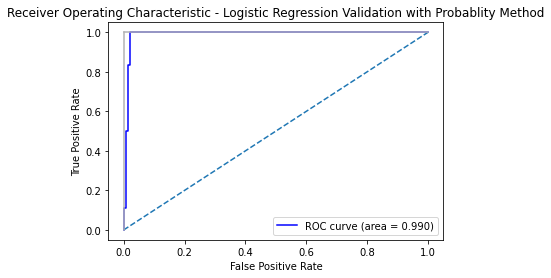

ROC Score of Validation for Logistic Regression :  Without Probablity Method  0.9347670250896056


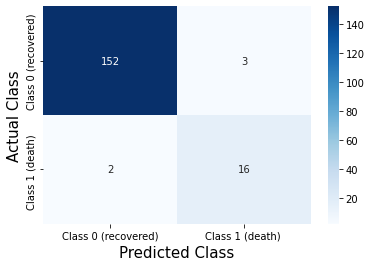

Confusion Matrix :
[[152   3]
 [  2  16]]
Report : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       155
           1       0.84      0.89      0.86        18

    accuracy                           0.97       173
   macro avg       0.91      0.93      0.92       173
weighted avg       0.97      0.97      0.97       173

Recall 0.9710982658959537
Precision 0.9719358827968502
F1Score 0.9714420633102939
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Accuracy Of Test Logistic Regression :  0.9653179190751445
AUC Of Test Logistic Regression :  0.906989247311828
Roc Score of Test for Logistic Regression :  0.9594982078853046
ROC Score of Test for Logistic Regression :  With Probablity Method  0.9594982078853046


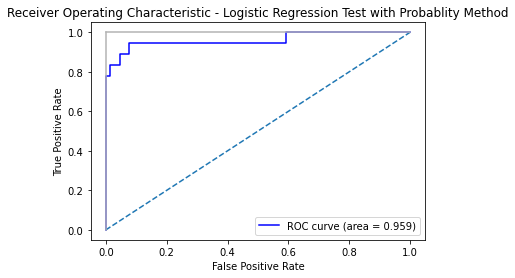

ROC Score of Test for Logistic Regression :  Without Probablity Method  0.906989247311828


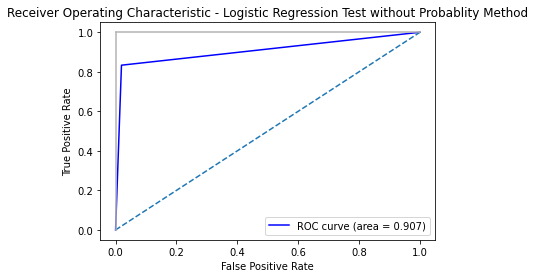

Confusion Matrix :
[[152   3]
 [  3  15]]
Report : 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       155
           1       0.83      0.83      0.83        18

    accuracy                           0.97       173
   macro avg       0.91      0.91      0.91       173
weighted avg       0.97      0.97      0.97       173

Recall 0.9653179190751445
Precision 0.9653179190751445
F1Score 0.9653179190751445
***************************** knn Model ****************************************
Accuracy Of Validation KNN :  0.9132947976878613
AUC Of Validation KNN :  0.8288530465949822
ROC Score of Validation for KNN :  With Probablity Method  0.8530465949820788


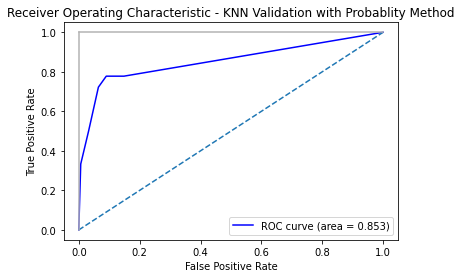

ROC Score of Validation for KNN :  Without Probablity Method  0.8288530465949822


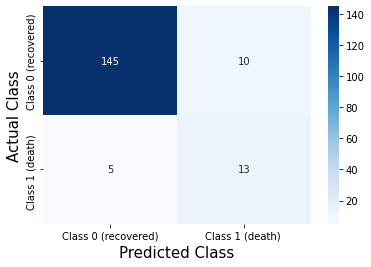

Confusion Matrix :
[[145  10]
 [  5  13]]
Report : 
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       155
           1       0.57      0.72      0.63        18

    accuracy                           0.91       173
   macro avg       0.77      0.83      0.79       173
weighted avg       0.92      0.91      0.92       173

Recall 0.9132947976878613
Precision 0.9248973779006451
F1Score 0.917871001888262
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Accuracy Of Test KNN :  0.9248554913294798
AUC Of Test KNN :  0.7862007168458782
ROC Score of Test for KNN :  With Probablity Method  0.8822580645161291


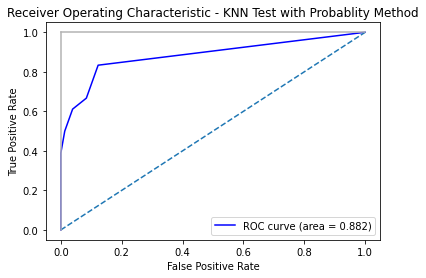

ROC Score of Test for KNN :  Without Probablity Method  0.7862007168458782


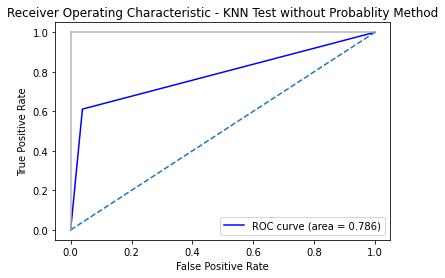

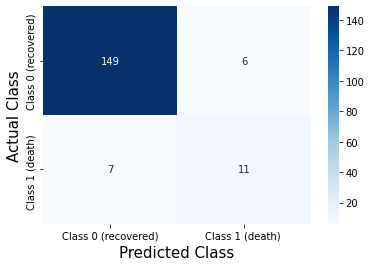

Confusion Matrix :
[[149   6]
 [  7  11]]
Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       155
           1       0.65      0.61      0.63        18

    accuracy                           0.92       173
   macro avg       0.80      0.79      0.79       173
weighted avg       0.92      0.92      0.92       173

Recall 0.9248554913294798
Precision 0.9230747434589666
F1Score 0.9239028094556596
***************************** Svm ****************************************
Accuracy Of Validation SVM :  0.976878612716763
AUC Of Validation SVM :  0.9625448028673834
ROC Score of Validation for SVM :  With Probablity Method  0.9831541218637994


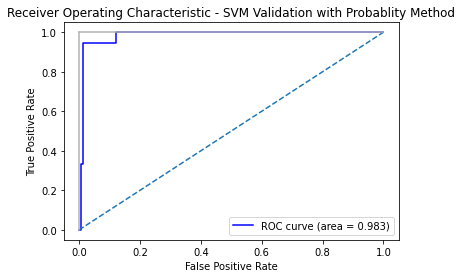

ROC Score of Validation for SVM :  Without Probablity Method  0.9625448028673834


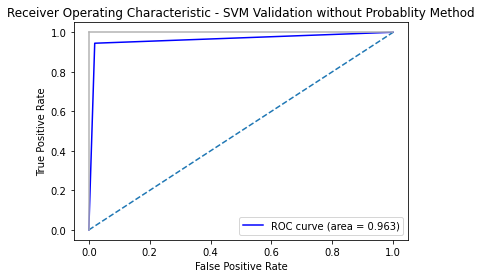

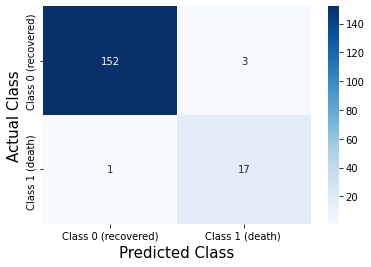

Confusion Matrix :
[[152   3]
 [  1  17]]
Report : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       155
           1       0.85      0.94      0.89        18

    accuracy                           0.98       173
   macro avg       0.92      0.96      0.94       173
weighted avg       0.98      0.98      0.98       173

Recall 0.976878612716763
Precision 0.9785371566738449
F1Score 0.9774120008376168
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Accuracy Of Test SVM :  0.9479768786127167
AUC Of Test SVM :  0.8727598566308243
ROC Score of Test for SVM :  With Probablity Method  0.9594982078853046


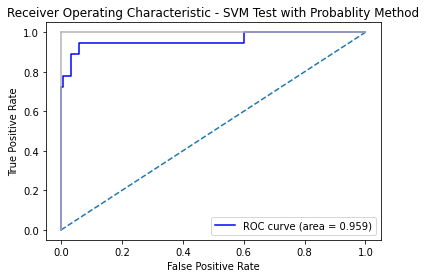

ROC Score of Test for SVM :  Without Probablity Method  0.8727598566308243


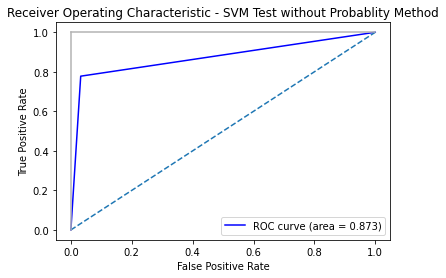

Confusion Matrix :
[[150   5]
 [  4  14]]
Report : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       155
           1       0.74      0.78      0.76        18

    accuracy                           0.95       173
   macro avg       0.86      0.87      0.86       173
weighted avg       0.95      0.95      0.95       173

Recall 0.9479768786127167
Precision 0.9493478836344672
F1Score 0.9485957139585289
***************************** Decision Tree Model ****************************************
Accuracy Of Validation Decision Tree :  0.9075144508670521
AUC Of Validation Decision Tree :  0.8256272401433692
ROC Score of Validation for Decision Tree :  With Probablity Method  0.8256272401433692


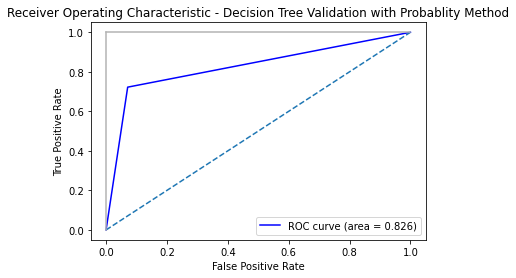

ROC Score of Validation for Decision Tree :  Without Probablity Method  0.8256272401433692


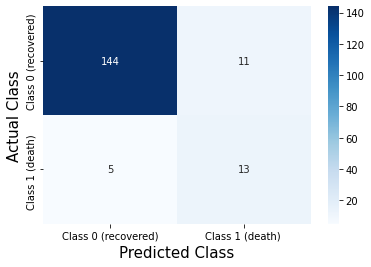

Confusion Matrix :
[[144  11]
 [  5  13]]
Report : 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       155
           1       0.54      0.72      0.62        18

    accuracy                           0.91       173
   macro avg       0.75      0.83      0.78       173
weighted avg       0.92      0.91      0.91       173

Recall 0.9075144508670521
Precision 0.9222465764053226
F1Score 0.9132078751792776
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Accuracy Of Test Decision Tree :  0.9653179190751445
AUC Of Test Decision Tree :  0.906989247311828
ROC Score of Test for Decision Tree :  0.906989247311828
ROC Score of Test for Decision Tree :  With Probablity Method  0.906989247311828


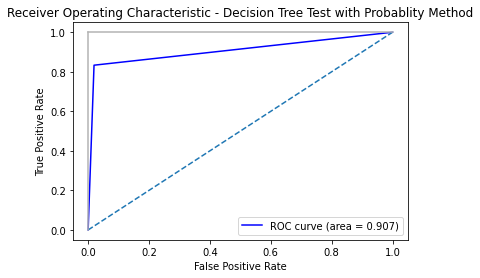

ROC Score of Test for Decision Tree :  Without Probablity Method  0.906989247311828


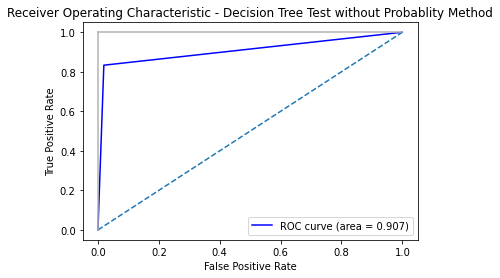

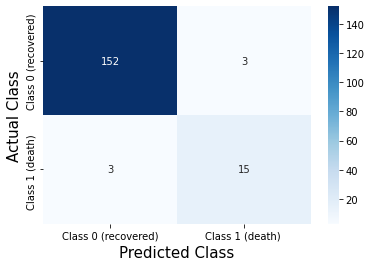

Confusion Matrix :
[[152   3]
 [  3  15]]
Report : 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       155
           1       0.83      0.83      0.83        18

    accuracy                           0.97       173
   macro avg       0.91      0.91      0.91       173
weighted avg       0.97      0.97      0.97       173

Recall 0.9653179190751445
Precision 0.9653179190751445
F1Score 0.9653179190751445
***************************** NavieBayes Model ****************************************
Accuracy Of Validation NavieBayes :  0.9190751445086706
AUC Of Validation NavieBayes :  0.832078853046595
ROC Score of Validation for NavieBayes :  With Probablity Method  0.9480286738351255


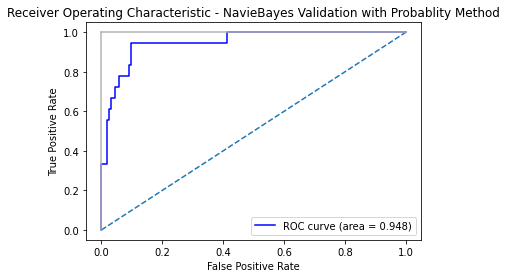

ROC Score of Validation for NavieBayes :  Without Probablity Method  0.832078853046595


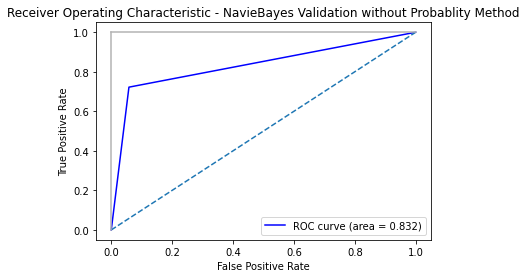

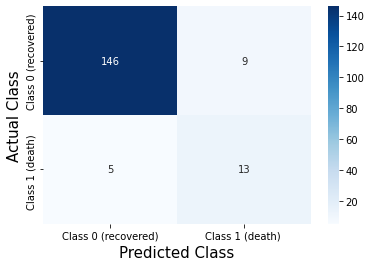

Confusion Matrix :
[[146   9]
 [  5  13]]
Report : 
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       155
           1       0.59      0.72      0.65        18

    accuracy                           0.92       173
   macro avg       0.78      0.83      0.80       173
weighted avg       0.93      0.92      0.92       173

Recall 0.9190751445086706
Precision 0.9277682850013745
F1Score 0.9225924666591104
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Accuracy Of Test NavieBayes :  0.9017341040462428
AUC Of Test NavieBayes :  0.7732974910394266
ROC Score of Test for NavieBayes :  With Probablity Method  0.8792114695340502


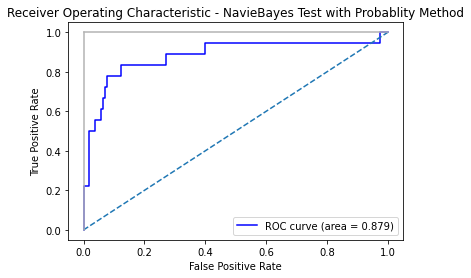

ROC Score of Test for NavieBayes :  Without Probablity Method  0.7732974910394266


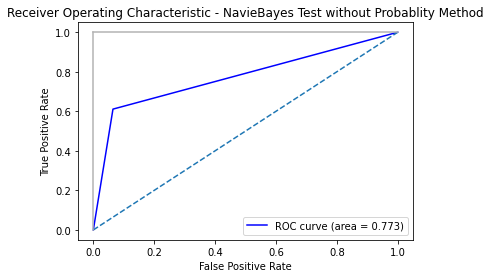

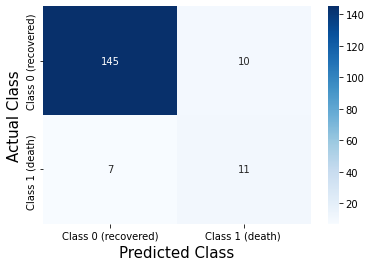

Confusion Matrix :
[[145  10]
 [  7  11]]
Report : 
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       155
           1       0.52      0.61      0.56        18

    accuracy                           0.90       173
   macro avg       0.74      0.77      0.75       173
weighted avg       0.91      0.90      0.91       173

Recall 0.9017341040462428
Precision 0.9091931418140726
F1Score 0.9050334350554644


(0.9017341040462428,
 0.9017341040462428,
 0.9091931418140726,
 0.7732974910394266,
 0.8792114695340502,
 0.9050334350554644)

In [167]:
# Model With Optimal value of Hyber Tunning For Testing
# Please Note the Output Here Consist of two part Validation and Testing for Each Model
seperator("Logistic Regression Model")
LogisticRegression(10)
#
seperator("knn Model")
knnModel(5)
#
seperator("Svm")
Svm(10)
#
seperator("Decision Tree Model")
DecisionTreeClassifierModel(7)
#
seperator("NavieBayes Model")
NavieBayes( 1.e-03)

Accuracy Of Validation Logistic Regression :  0.9710982658959537
AUC Of Validation Logistic Regression :  0.9347670250896056
ROC Score of Validation for Logistic Regression :  With Probablity Method  0.9899641577060931


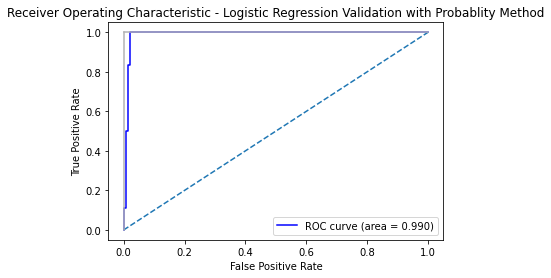

ROC Score of Validation for Logistic Regression :  Without Probablity Method  0.9347670250896056


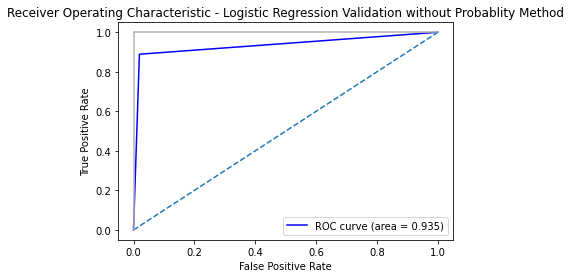

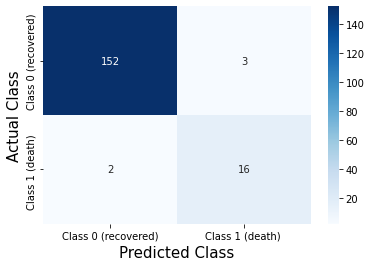

Confusion Matrix :
[[152   3]
 [  2  16]]
Report : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       155
           1       0.84      0.89      0.86        18

    accuracy                           0.97       173
   macro avg       0.91      0.93      0.92       173
weighted avg       0.97      0.97      0.97       173

Recall 0.9710982658959537
Precision 0.9719358827968502
F1Score 0.9714420633102939
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Accuracy Of Test Logistic Regression :  0.9653179190751445
AUC Of Test Logistic Regression :  0.906989247311828
Roc Score of Test for Logistic Regression :  0.9594982078853046
ROC Score of Test for Logistic Regression :  With Probablity Method  0.9594982078853046


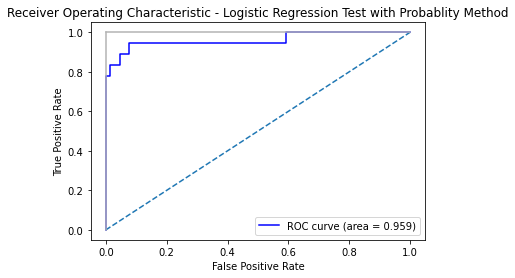

ROC Score of Test for Logistic Regression :  Without Probablity Method  0.906989247311828


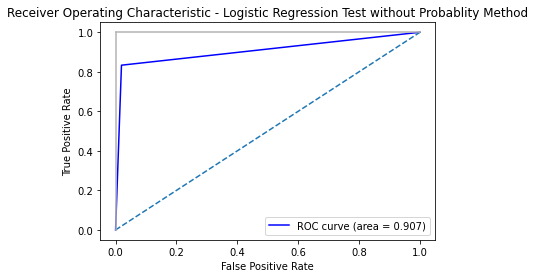

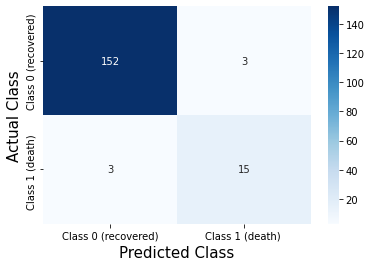

Confusion Matrix :
[[152   3]
 [  3  15]]
Report : 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       155
           1       0.83      0.83      0.83        18

    accuracy                           0.97       173
   macro avg       0.91      0.91      0.91       173
weighted avg       0.97      0.97      0.97       173

Recall 0.9653179190751445
Precision 0.9653179190751445
F1Score 0.9653179190751445
Accuracy Of Validation KNN :  0.9132947976878613
AUC Of Validation KNN :  0.8288530465949822
ROC Score of Validation for KNN :  With Probablity Method  0.8530465949820788


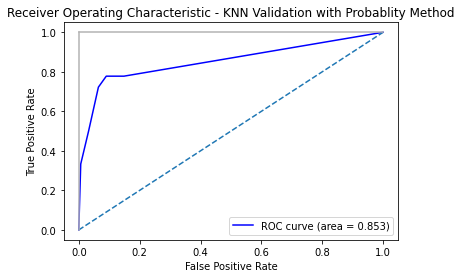

ROC Score of Validation for KNN :  Without Probablity Method  0.8288530465949822


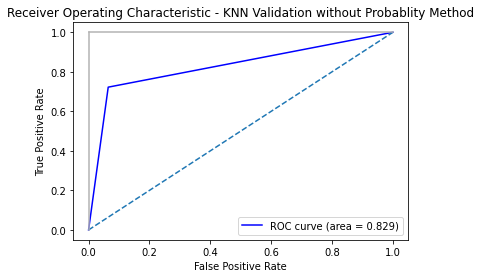

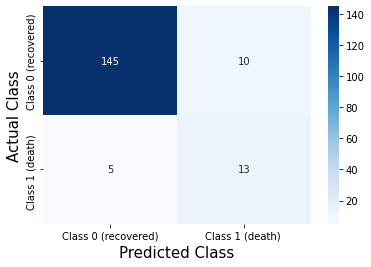

Confusion Matrix :
[[145  10]
 [  5  13]]
Report : 
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       155
           1       0.57      0.72      0.63        18

    accuracy                           0.91       173
   macro avg       0.77      0.83      0.79       173
weighted avg       0.92      0.91      0.92       173

Recall 0.9132947976878613
Precision 0.9248973779006451
F1Score 0.917871001888262
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Accuracy Of Test KNN :  0.9248554913294798
AUC Of Test KNN :  0.7862007168458782
ROC Score of Test for KNN :  With Probablity Method  0.8822580645161291


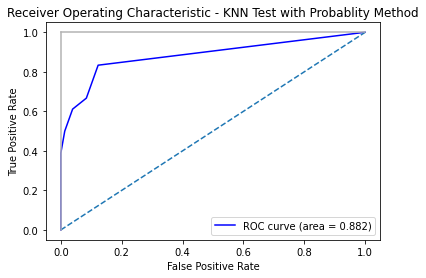

ROC Score of Test for KNN :  Without Probablity Method  0.7862007168458782


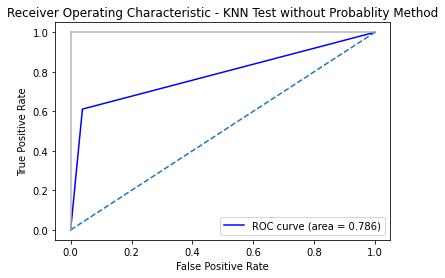

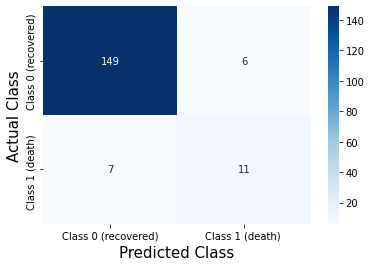

Confusion Matrix :
[[149   6]
 [  7  11]]
Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       155
           1       0.65      0.61      0.63        18

    accuracy                           0.92       173
   macro avg       0.80      0.79      0.79       173
weighted avg       0.92      0.92      0.92       173

Recall 0.9248554913294798
Precision 0.9230747434589666
F1Score 0.9239028094556596
Accuracy Of Validation SVM :  0.976878612716763
AUC Of Validation SVM :  0.9625448028673834
ROC Score of Validation for SVM :  With Probablity Method  0.9831541218637994


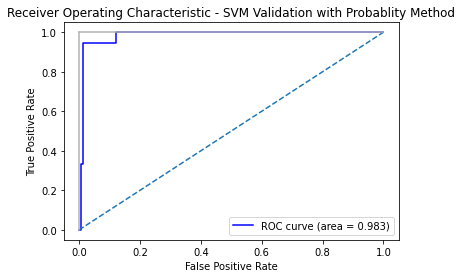

ROC Score of Validation for SVM :  Without Probablity Method  0.9625448028673834


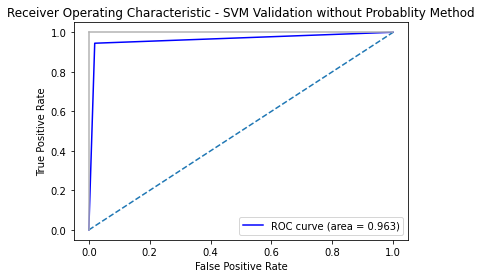

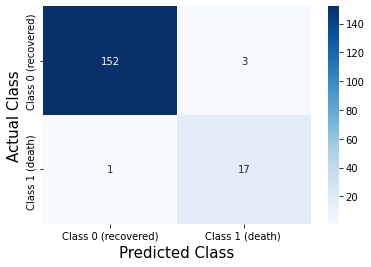

Confusion Matrix :
[[152   3]
 [  1  17]]
Report : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       155
           1       0.85      0.94      0.89        18

    accuracy                           0.98       173
   macro avg       0.92      0.96      0.94       173
weighted avg       0.98      0.98      0.98       173

Recall 0.976878612716763
Precision 0.9785371566738449
F1Score 0.9774120008376168
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Accuracy Of Test SVM :  0.9479768786127167
AUC Of Test SVM :  0.8727598566308243
ROC Score of Test for SVM :  With Probablity Method  0.9594982078853046


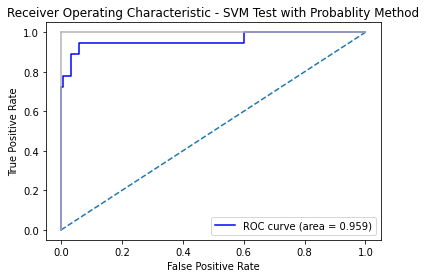

ROC Score of Test for SVM :  Without Probablity Method  0.8727598566308243


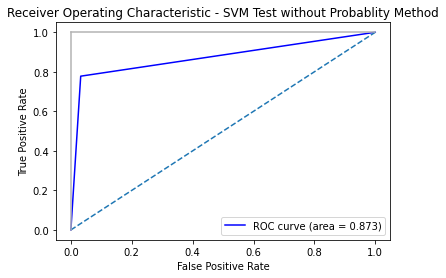

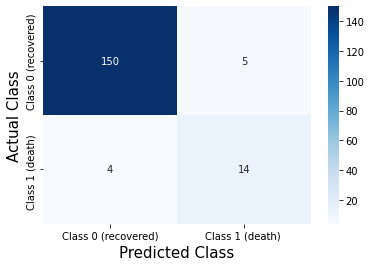

Confusion Matrix :
[[150   5]
 [  4  14]]
Report : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       155
           1       0.74      0.78      0.76        18

    accuracy                           0.95       173
   macro avg       0.86      0.87      0.86       173
weighted avg       0.95      0.95      0.95       173

Recall 0.9479768786127167
Precision 0.9493478836344672
F1Score 0.9485957139585289
Accuracy Of Validation Decision Tree :  0.9075144508670521
AUC Of Validation Decision Tree :  0.8256272401433692
ROC Score of Validation for Decision Tree :  With Probablity Method  0.8256272401433692


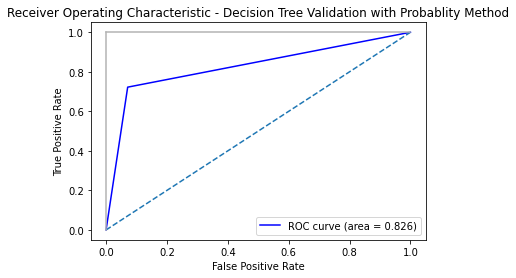

ROC Score of Validation for Decision Tree :  Without Probablity Method  0.8256272401433692


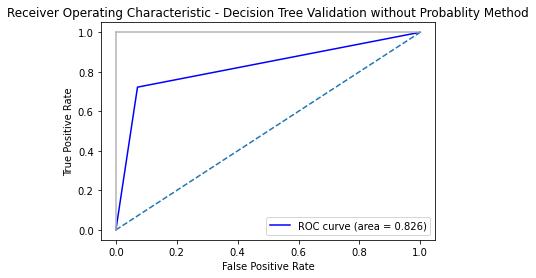

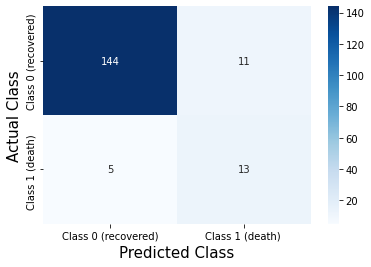

Confusion Matrix :
[[144  11]
 [  5  13]]
Report : 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       155
           1       0.54      0.72      0.62        18

    accuracy                           0.91       173
   macro avg       0.75      0.83      0.78       173
weighted avg       0.92      0.91      0.91       173

Recall 0.9075144508670521
Precision 0.9222465764053226
F1Score 0.9132078751792776
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Accuracy Of Test Decision Tree :  0.9653179190751445
AUC Of Test Decision Tree :  0.906989247311828
ROC Score of Test for Decision Tree :  0.906989247311828
ROC Score of Test for Decision Tree :  With Probablity Method  0.906989247311828


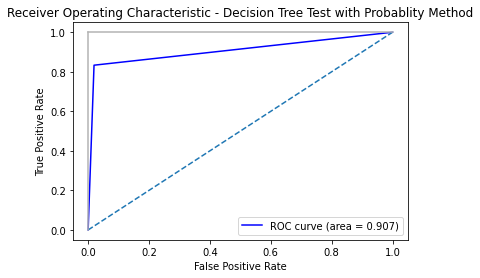

ROC Score of Test for Decision Tree :  Without Probablity Method  0.906989247311828


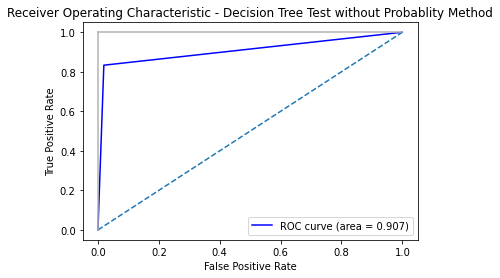

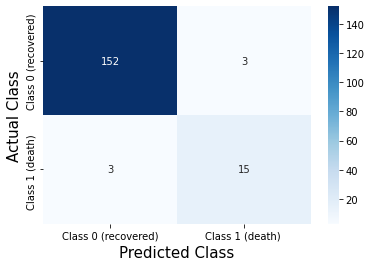

Confusion Matrix :
[[152   3]
 [  3  15]]
Report : 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       155
           1       0.83      0.83      0.83        18

    accuracy                           0.97       173
   macro avg       0.91      0.91      0.91       173
weighted avg       0.97      0.97      0.97       173

Recall 0.9653179190751445
Precision 0.9653179190751445
F1Score 0.9653179190751445
Accuracy Of Validation NavieBayes :  0.9190751445086706
AUC Of Validation NavieBayes :  0.832078853046595
ROC Score of Validation for NavieBayes :  With Probablity Method  0.9480286738351255


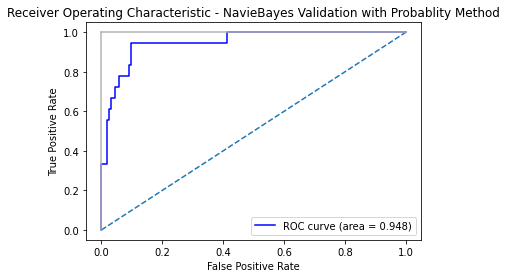

ROC Score of Validation for NavieBayes :  Without Probablity Method  0.832078853046595


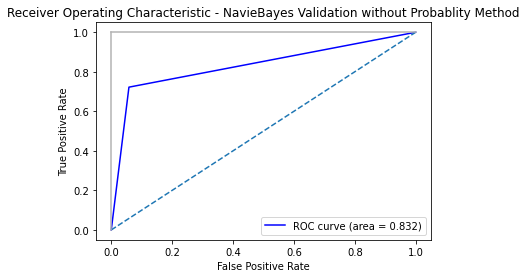

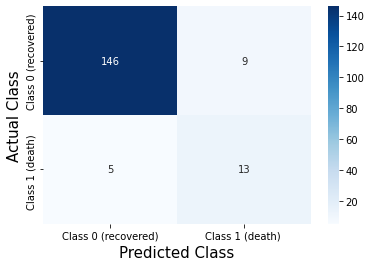

Confusion Matrix :
[[146   9]
 [  5  13]]
Report : 
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       155
           1       0.59      0.72      0.65        18

    accuracy                           0.92       173
   macro avg       0.78      0.83      0.80       173
weighted avg       0.93      0.92      0.92       173

Recall 0.9190751445086706
Precision 0.9277682850013745
F1Score 0.9225924666591104
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Accuracy Of Test NavieBayes :  0.9017341040462428
AUC Of Test NavieBayes :  0.7732974910394266
ROC Score of Test for NavieBayes :  With Probablity Method  0.8792114695340502


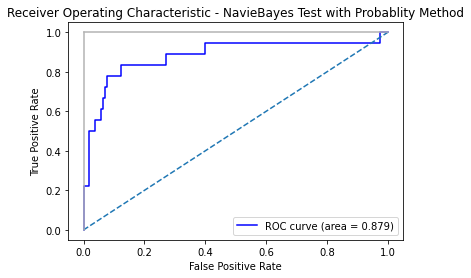

ROC Score of Test for NavieBayes :  Without Probablity Method  0.7732974910394266


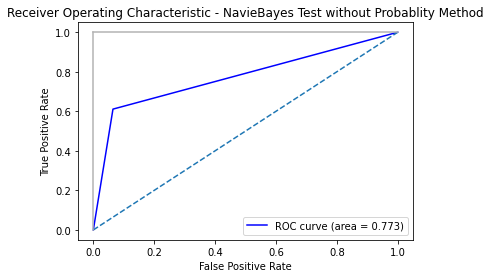

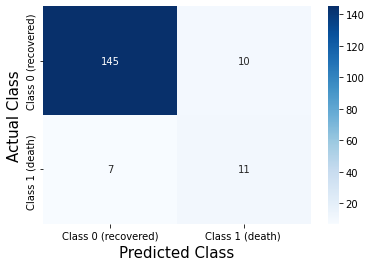

Confusion Matrix :
[[145  10]
 [  7  11]]
Report : 
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       155
           1       0.52      0.61      0.56        18

    accuracy                           0.90       173
   macro avg       0.74      0.77      0.75       173
weighted avg       0.91      0.90      0.91       173

Recall 0.9017341040462428
Precision 0.9091931418140726
F1Score 0.9050334350554644


In [168]:
#Names
Names=["Logistic","KNN","SVM","Decision","Navie Bayes"]
#Choose The best Model here according to test data
accuracyLogistic,recallLogistic,precionLogistic,aucLogistic,rocLogistic,F1ScoreLogistic=LogisticRegression(10)
#
accuracyKNN,recallKNN,precionKNN,aucKNN,rocKNN,F1ScoreKNN=knnModel(5)
#
accuracySVM,recallSVM,precionSVM,aucSVM,rocSVM,F1ScoreSVM=Svm(10)
#
accuracyTree,recallTree,precionTree,aucTree,rocTree,F1ScoreTree=DecisionTreeClassifierModel(7)
#
accuracyNavieBayes,recallNavieBayes,precionNavieBayes,aucNavieBayes,rocNavieBayes,F1ScoreNavieBayes=NavieBayes( 1.e-03)

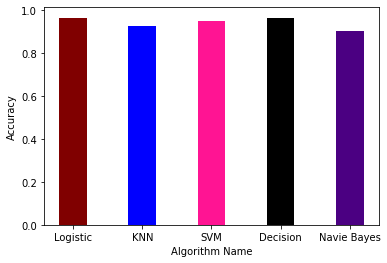

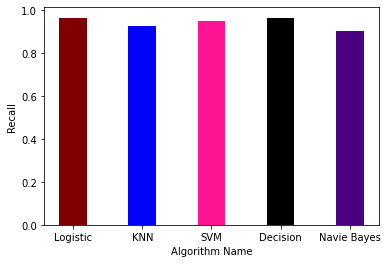

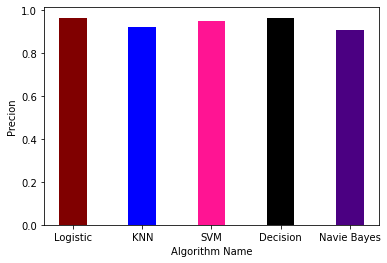

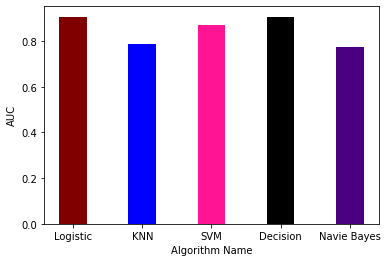

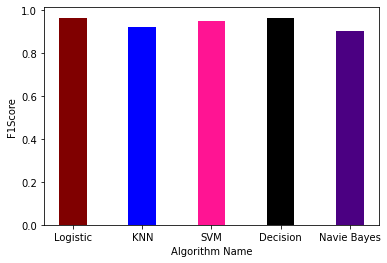

'\nprint([accuracyLogistic,accuracyKNN,accuracySVM,accuracyTree,accuracyNavieBayes])\nprint([recallLogistic,recallKNN,recallSVM,recallTree,recallNavieBayes])\nprint([precionLogistic,precionKNN,precionSVM,precionTree,precionNavieBayes])\nprint([aucLogistic,aucKNN,aucSVM,aucTree,aucNavieBayes])\nprint([rocLogistic,rocKNN,rocSVM,rocTree,rocNavieBayes])\nprint([F1ScoreLogistic,F1ScoreKNN,F1ScoreSVM,F1ScoreTree,F1ScoreNavieBayes])\n'

In [205]:
# Here Plot Each Performance In Each Graph 
ColorList=["maroon","blue","deeppink","black","indigo"]
plt.bar(Names,[accuracyLogistic,accuracyKNN,accuracySVM,accuracyTree,accuracyNavieBayes], width = 0.4,color=ColorList)
plt.xlabel("Algorithm Name")
plt.ylabel("Accuracy")
plt.show()
#
plt.bar(Names,[recallLogistic,recallKNN,recallSVM,recallTree,recallNavieBayes], width = 0.4,color=ColorList)
plt.xlabel("Algorithm Name")
plt.ylabel("Recall")
plt.show()
#
plt.bar(Names,[precionLogistic,precionKNN,precionSVM,precionTree,precionNavieBayes], width = 0.4,color=ColorList)
plt.xlabel("Algorithm Name")
plt.ylabel("Precion")
plt.show()
#
plt.bar(Names,[aucLogistic,aucKNN,aucSVM,aucTree,aucNavieBayes], width = 0.4,color=ColorList)
plt.xlabel("Algorithm Name")
plt.ylabel("AUC")
plt.show()
#
plt.bar(Names,[rocLogistic,rocKNN,rocSVM,rocTree,rocNavieBayes], width = 0.4,color=ColorList)
plt.xlabel("Algorithm Name")
plt.ylabel("ROC")
plt.show()
#
plt.bar(Names,[F1ScoreLogistic,F1ScoreKNN,F1ScoreSVM,F1ScoreTree,F1ScoreNavieBayes], width = 0.4,color=ColorList)
plt.xlabel("Algorithm Name")
plt.ylabel("F1Score")
plt.show()
'''
print([accuracyLogistic,accuracyKNN,accuracySVM,accuracyTree,accuracyNavieBayes])
print([recallLogistic,recallKNN,recallSVM,recallTree,recallNavieBayes])
print([precionLogistic,precionKNN,precionSVM,precionTree,precionNavieBayes])
print([aucLogistic,aucKNN,aucSVM,aucTree,aucNavieBayes])
print([rocLogistic,rocKNN,rocSVM,rocTree,rocNavieBayes])
print([F1ScoreLogistic,F1ScoreKNN,F1ScoreSVM,F1ScoreTree,F1ScoreNavieBayes])
'''


In [170]:
#Trials # For Report
'''
KnnListAccuraccy=[]
KnnListRecall=[]
KnnListPrecision=[]
KnnListRoc=[]
KnnListAuc=[]
KnnListF1Score=[]

for i in range (10):
  #print(i+1)
  accuracy,recall,precion,auc,roc,F1Score=knnModel(i+1)
  KnnListAccuraccy.append(accuracy)#calling
  KnnListRecall.append(recall)#calling
  KnnListPrecision.append(precion)#calling
  KnnListAuc.append(auc)#calling
  KnnListRoc.append(roc)#calling
  KnnListF1Score.append(F1Score)


print(KnnListAccuraccy)
print(KnnListPrecision)
print(KnnListRecall)
print(KnnListF1Score)
print(KnnListAuc)
print(KnnListRoc)

'''


'\nKnnListAccuraccy=[]\nKnnListRecall=[]\nKnnListPrecision=[]\nKnnListRoc=[]\nKnnListAuc=[]\nKnnListF1Score=[]\n\nfor i in range (10):\n  #print(i+1)\n  accuracy,recall,precion,auc,roc,F1Score=knnModel(i+1)\n  KnnListAccuraccy.append(accuracy)#calling\n  KnnListRecall.append(recall)#calling\n  KnnListPrecision.append(precion)#calling\n  KnnListAuc.append(auc)#calling\n  KnnListRoc.append(roc)#calling\n  KnnListF1Score.append(F1Score)\n\n\nprint(KnnListAccuraccy)\nprint(KnnListPrecision)\nprint(KnnListRecall)\nprint(KnnListF1Score)\nprint(KnnListAuc)\nprint(KnnListRoc)\n\n'

In [171]:
'''
plt.plot([1,2,3,4,5,6,7,8,9,10],KnnListAccuraccy )
 
# naming the x axis
plt.xlabel('K value')
# naming the y axis
plt.ylabel('Accuracy')
 
# giving a title to my graph
plt.title('KNN On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot([1,2,3,4,5,6,7,8,9,10],KnnListAccuraccy )\n \n# naming the x axis\nplt.xlabel('K value')\n# naming the y axis\nplt.ylabel('Accuracy')\n \n# giving a title to my graph\nplt.title('KNN On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [172]:
'''
plt.plot([1,2,3,4,5,6,7,8,9,10],KnnListRecall )
 
plt.xlabel('K value')
# naming the y axis
plt.ylabel('Recall')
 
# giving a title to my graph
plt.title('KNN On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot([1,2,3,4,5,6,7,8,9,10],KnnListRecall )\n \nplt.xlabel('K value')\n# naming the y axis\nplt.ylabel('Recall')\n \n# giving a title to my graph\nplt.title('KNN On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [173]:
'''
plt.plot([1,2,3,4,5,6,7,8,9,10],KnnListPrecision )
 
# naming the x axis
plt.xlabel('K value')
# naming the y axis
plt.ylabel('Precision')
 
# giving a title to my graph
plt.title('KNN On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot([1,2,3,4,5,6,7,8,9,10],KnnListPrecision )\n \n# naming the x axis\nplt.xlabel('K value')\n# naming the y axis\nplt.ylabel('Precision')\n \n# giving a title to my graph\nplt.title('KNN On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [174]:
'''
plt.plot([1,2,3,4,5,6,7,8,9,10],KnnListAuc )
 
plt.xlabel('K value')
# naming the y axis
plt.ylabel('AUC')
 
# giving a title to my graph
plt.title('KNN On Validate Data')
# function to show the plot
plt.show()
'''

"\nplt.plot([1,2,3,4,5,6,7,8,9,10],KnnListAuc )\n \nplt.xlabel('K value')\n# naming the y axis\nplt.ylabel('AUC')\n \n# giving a title to my graph\nplt.title('KNN On Validate Data')\n# function to show the plot\nplt.show()\n"

In [175]:
'''
plt.plot([1,2,3,4,5,6,7,8,9,10],KnnListRoc )
 
# naming the x axis
plt.xlabel('K value')
# naming the y axis
plt.ylabel('ROC')
 
# giving a title to my graph
plt.title('KNN On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot([1,2,3,4,5,6,7,8,9,10],KnnListRoc )\n \n# naming the x axis\nplt.xlabel('K value')\n# naming the y axis\nplt.ylabel('ROC')\n \n# giving a title to my graph\nplt.title('KNN On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [176]:
'''
plt.plot([1,2,3,4,5,6,7,8,9,10],KnnListF1Score )
 
# naming the x axis
plt.xlabel('K value')
# naming the y axis
plt.ylabel('F1 Score')
 
# giving a title to my graph
plt.title('KNN On Validate Data')
 
# function to show the plot
plt.show()
'''


"\nplt.plot([1,2,3,4,5,6,7,8,9,10],KnnListF1Score )\n \n# naming the x axis\nplt.xlabel('K value')\n# naming the y axis\nplt.ylabel('F1 Score')\n \n# giving a title to my graph\nplt.title('KNN On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [177]:
############################ Logistic Regression ########################
#Trials # For Report
'''
LogisticListAccuraccy=[]
LogisticListRecall=[]
LogisticListPrecision=[]
LogisticListRoc=[]
LogisticListAuc=[]
LogisticListF1Score=[]
C=[100, 10, 1.0, 0.1, 0.01]
for i in (C):
  accuracy,recall,precion,auc,roc,F1Score=LogisticRegression(i)
  LogisticListAccuraccy.append(accuracy)#calling
  LogisticListRecall.append(recall)#calling
  LogisticListPrecision.append(precion)#calling
  LogisticListAuc.append(auc)#calling
  LogisticListRoc.append(roc)#calling
  LogisticListF1Score.append(F1Score)


print(LogisticListAccuraccy)
print(LogisticListPrecision)
print(LogisticListRecall)
print(LogisticListF1Score)
print(LogisticListAuc)
print(LogisticListRoc)
'''

'\nLogisticListAccuraccy=[]\nLogisticListRecall=[]\nLogisticListPrecision=[]\nLogisticListRoc=[]\nLogisticListAuc=[]\nLogisticListF1Score=[]\nC=[100, 10, 1.0, 0.1, 0.01]\nfor i in (C):\n  accuracy,recall,precion,auc,roc,F1Score=LogisticRegression(i)\n  LogisticListAccuraccy.append(accuracy)#calling\n  LogisticListRecall.append(recall)#calling\n  LogisticListPrecision.append(precion)#calling\n  LogisticListAuc.append(auc)#calling\n  LogisticListRoc.append(roc)#calling\n  LogisticListF1Score.append(F1Score)\n\n\nprint(LogisticListAccuraccy)\nprint(LogisticListPrecision)\nprint(LogisticListRecall)\nprint(LogisticListF1Score)\nprint(LogisticListAuc)\nprint(LogisticListRoc)\n'

In [178]:
'''
plt.plot(C,LogisticListRecall)
 
plt.xlabel('C value')
# naming the y axis
plt.ylabel('Recall')
 
# giving a title to my graph
plt.title('Logistic Regression On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(C,LogisticListRecall)\n \nplt.xlabel('C value')\n# naming the y axis\nplt.ylabel('Recall')\n \n# giving a title to my graph\nplt.title('Logistic Regression On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [179]:
'''
plt.plot(C,LogisticListAccuraccy)
 
plt.xlabel('C value')
# naming the y axis
plt.ylabel('Accuracy')
 
# giving a title to my graph
plt.title('Logistic Regression On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(C,LogisticListAccuraccy)\n \nplt.xlabel('C value')\n# naming the y axis\nplt.ylabel('Accuracy')\n \n# giving a title to my graph\nplt.title('Logistic Regression On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [180]:
'''
plt.plot(C,LogisticListF1Score)
 
plt.xlabel('C value')
# naming the y axis
plt.ylabel('F1-Score')
 
# giving a title to my graph
plt.title('Logistic Regression On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(C,LogisticListF1Score)\n \nplt.xlabel('C value')\n# naming the y axis\nplt.ylabel('F1-Score')\n \n# giving a title to my graph\nplt.title('Logistic Regression On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [181]:
'''
plt.plot(C,LogisticListPrecision)
 
plt.xlabel('C value')
# naming the y axis
plt.ylabel('Precision')
 
# giving a title to my graph
plt.title('Logistic Regression On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(C,LogisticListPrecision)\n \nplt.xlabel('C value')\n# naming the y axis\nplt.ylabel('Precision')\n \n# giving a title to my graph\nplt.title('Logistic Regression On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [182]:
'''
plt.plot(C,LogisticListAuc)
 
plt.xlabel('C value')
# naming the y axis
plt.ylabel('AUC')
 
# giving a title to my graph
plt.title('Logistic Regression On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(C,LogisticListAuc)\n \nplt.xlabel('C value')\n# naming the y axis\nplt.ylabel('AUC')\n \n# giving a title to my graph\nplt.title('Logistic Regression On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [183]:
'''
plt.plot(C,LogisticListRoc)
 
plt.xlabel('C value')
# naming the y axis
plt.ylabel('ROC')
 
# giving a title to my graph
plt.title('Logistic Regression On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(C,LogisticListRoc)\n \nplt.xlabel('C value')\n# naming the y axis\nplt.ylabel('ROC')\n \n# giving a title to my graph\nplt.title('Logistic Regression On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [184]:
############################ Decision Tree ########################
#Trials # For Report
'''
DecisionTreeListAccuraccy=[]
DecisionTreeListRecall=[]
DecisionTreeListPrecision=[]
DecisionTreeListRoc=[]
DecisionTreeListAuc=[]
DecisionTreeListF1Score=[]
for i in range(1,33):
  accuracy,recall,precion,auc,roc,F1Score=DecisionTreeClassifierModel(i)
  DecisionTreeListAccuraccy.append(accuracy)#calling
  DecisionTreeListRecall.append(recall)#calling
  DecisionTreeListPrecision.append(precion)#calling
  DecisionTreeListAuc.append(auc)#calling
  DecisionTreeListRoc.append(roc)#calling
  DecisionTreeListF1Score.append(F1Score)


print(DecisionTreeListAccuraccy)
print(DecisionTreeListPrecision)
print(DecisionTreeListRecall)
print(DecisionTreeListF1Score)
print(DecisionTreeListAuc)
print(DecisionTreeListRoc)
'''

'\nDecisionTreeListAccuraccy=[]\nDecisionTreeListRecall=[]\nDecisionTreeListPrecision=[]\nDecisionTreeListRoc=[]\nDecisionTreeListAuc=[]\nDecisionTreeListF1Score=[]\nfor i in range(1,33):\n  accuracy,recall,precion,auc,roc,F1Score=DecisionTreeClassifierModel(i)\n  DecisionTreeListAccuraccy.append(accuracy)#calling\n  DecisionTreeListRecall.append(recall)#calling\n  DecisionTreeListPrecision.append(precion)#calling\n  DecisionTreeListAuc.append(auc)#calling\n  DecisionTreeListRoc.append(roc)#calling\n  DecisionTreeListF1Score.append(F1Score)\n\n\nprint(DecisionTreeListAccuraccy)\nprint(DecisionTreeListPrecision)\nprint(DecisionTreeListRecall)\nprint(DecisionTreeListF1Score)\nprint(DecisionTreeListAuc)\nprint(DecisionTreeListRoc)\n'

In [185]:
'''
max_depth_range=list(range(1, 33,1))
plt.plot(max_depth_range,DecisionTreeListRoc)
 
plt.xlabel('Max Depth')
# naming the y axis
plt.ylabel('ROC')
 
# giving a title to my graph
plt.title('Decision Tree On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nmax_depth_range=list(range(1, 33,1))\nplt.plot(max_depth_range,DecisionTreeListRoc)\n \nplt.xlabel('Max Depth')\n# naming the y axis\nplt.ylabel('ROC')\n \n# giving a title to my graph\nplt.title('Decision Tree On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [186]:
'''
plt.plot(max_depth_range,DecisionTreeListAccuraccy)
 
plt.xlabel('Max Depth')
# naming the y axis
plt.ylabel('Accuracy')
 
# giving a title to my graph
plt.title('Decision Tree On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(max_depth_range,DecisionTreeListAccuraccy)\n \nplt.xlabel('Max Depth')\n# naming the y axis\nplt.ylabel('Accuracy')\n \n# giving a title to my graph\nplt.title('Decision Tree On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [187]:
'''
plt.plot(max_depth_range,DecisionTreeListAuc)
 
plt.xlabel('Max Depth')
# naming the y axis
plt.ylabel('AUC')
 
# giving a title to my graph
plt.title('Decision Tree On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(max_depth_range,DecisionTreeListAuc)\n \nplt.xlabel('Max Depth')\n# naming the y axis\nplt.ylabel('AUC')\n \n# giving a title to my graph\nplt.title('Decision Tree On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [188]:
'''
plt.plot(max_depth_range,DecisionTreeListF1Score)
 
plt.xlabel('Max Depth')
# naming the y axis
plt.ylabel('F1-Score')
 
# giving a title to my graph
plt.title('Decision Tree On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(max_depth_range,DecisionTreeListF1Score)\n \nplt.xlabel('Max Depth')\n# naming the y axis\nplt.ylabel('F1-Score')\n \n# giving a title to my graph\nplt.title('Decision Tree On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [189]:
'''
plt.plot(max_depth_range,DecisionTreeListPrecision)
 
plt.xlabel('Max Depth')
# naming the y axis
plt.ylabel('Precision')
 
# giving a title to my graph
plt.title('Decision Tree On Validate Data')
 
# function to show the plot
plt.show()
'''


"\nplt.plot(max_depth_range,DecisionTreeListPrecision)\n \nplt.xlabel('Max Depth')\n# naming the y axis\nplt.ylabel('Precision')\n \n# giving a title to my graph\nplt.title('Decision Tree On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [190]:
'''
plt.plot(max_depth_range,DecisionTreeListRecall)
 
plt.xlabel('Max Depth')
# naming the y axis
plt.ylabel('Recall')
 
# giving a title to my graph
plt.title('Decision Tree On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(max_depth_range,DecisionTreeListRecall)\n \nplt.xlabel('Max Depth')\n# naming the y axis\nplt.ylabel('Recall')\n \n# giving a title to my graph\nplt.title('Decision Tree On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [191]:
############################ SVM ################################
#Trials # For Report
'''
cValues=[100, 10, 1.0, 0.1, 0.01]
#
SVMListAccuraccy=[]
SVMListRecall=[]
SVMListPrecision=[]
SVMListRoc=[]
SVMListAuc=[]
SVMListF1Score=[]
for i in cValues:
  accuracy,recall,precion,auc,roc,F1Score=Svm(i)
  SVMListAccuraccy.append(accuracy)#calling
  SVMListRecall.append(recall)#calling
  SVMListPrecision.append(precion)#calling
  SVMListAuc.append(auc)#calling
  SVMListRoc.append(roc)#calling
  SVMListF1Score.append(F1Score)


print(SVMListAccuraccy)
print(SVMListPrecision)
print(SVMListRecall)
print(SVMListF1Score)
print(SVMListAuc)
print(SVMListRoc)
'''

'\ncValues=[100, 10, 1.0, 0.1, 0.01]\n#\nSVMListAccuraccy=[]\nSVMListRecall=[]\nSVMListPrecision=[]\nSVMListRoc=[]\nSVMListAuc=[]\nSVMListF1Score=[]\nfor i in cValues:\n  accuracy,recall,precion,auc,roc,F1Score=Svm(i)\n  SVMListAccuraccy.append(accuracy)#calling\n  SVMListRecall.append(recall)#calling\n  SVMListPrecision.append(precion)#calling\n  SVMListAuc.append(auc)#calling\n  SVMListRoc.append(roc)#calling\n  SVMListF1Score.append(F1Score)\n\n\nprint(SVMListAccuraccy)\nprint(SVMListPrecision)\nprint(SVMListRecall)\nprint(SVMListF1Score)\nprint(SVMListAuc)\nprint(SVMListRoc)\n'

In [192]:
'''
plt.plot(cValues,SVMListAccuraccy)
 
plt.xlabel('C Value')
# naming the y axis
plt.ylabel('Accuracy')
 
# giving a title to my graph
plt.title('SVM On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(cValues,SVMListAccuraccy)\n \nplt.xlabel('C Value')\n# naming the y axis\nplt.ylabel('Accuracy')\n \n# giving a title to my graph\nplt.title('SVM On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [193]:
'''
plt.plot(cValues,SVMListAuc)
 
plt.xlabel('C Value')
# naming the y axis
plt.ylabel('AUC')
 
# giving a title to my graph
plt.title('SVM On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(cValues,SVMListAuc)\n \nplt.xlabel('C Value')\n# naming the y axis\nplt.ylabel('AUC')\n \n# giving a title to my graph\nplt.title('SVM On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [194]:
'''
plt.plot(cValues,SVMListRoc)
 
plt.xlabel('C Value')
# naming the y axis
plt.ylabel('ROC')
 
# giving a title to my graph
plt.title('SVM On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(cValues,SVMListRoc)\n \nplt.xlabel('C Value')\n# naming the y axis\nplt.ylabel('ROC')\n \n# giving a title to my graph\nplt.title('SVM On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [195]:
'''
plt.plot(cValues,SVMListRecall)
 
plt.xlabel('C Value')
# naming the y axis
plt.ylabel('Recall')
 
# giving a title to my graph
plt.title('SVM On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(cValues,SVMListRecall)\n \nplt.xlabel('C Value')\n# naming the y axis\nplt.ylabel('Recall')\n \n# giving a title to my graph\nplt.title('SVM On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [196]:
'''
plt.plot(cValues,SVMListPrecision)
 
plt.xlabel('C Value')
# naming the y axis
plt.ylabel('Precision')
 
# giving a title to my graph
plt.title('SVM On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(cValues,SVMListPrecision)\n \nplt.xlabel('C Value')\n# naming the y axis\nplt.ylabel('Precision')\n \n# giving a title to my graph\nplt.title('SVM On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [197]:
'''
plt.plot(cValues,SVMListF1Score)
 
plt.xlabel('C Value')
# naming the y axis
plt.ylabel('F1-Score')
 
# giving a title to my graph
plt.title('SVM On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(cValues,SVMListF1Score)\n \nplt.xlabel('C Value')\n# naming the y axis\nplt.ylabel('F1-Score')\n \n# giving a title to my graph\nplt.title('SVM On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [198]:
############################## Navie Bayes ####################################
#Trials # For Report
'''
var_smoothing=[1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,1.e-08, 1.e-09]
#
BayesListAccuraccy=[]
BayesListRecall=[]
BayesListPrecision=[]
BayesListRoc=[]
BayesListAuc=[]
BayesListF1Score=[]
for i in var_smoothing:
  accuracy,recall,precion,auc,roc,F1Score=NavieBayes(i)
  BayesListAccuraccy.append(accuracy)#calling
  BayesListRecall.append(recall)#calling
  BayesListPrecision.append(precion)#calling
  BayesListAuc.append(auc)#calling
  BayesListRoc.append(roc)#calling
  BayesListF1Score.append(F1Score)


print(BayesListAccuraccy)
print(BayesListPrecision)
print(BayesListRecall)
print(BayesListF1Score)
print(BayesListAuc)
print(BayesListRoc)
'''

'\nvar_smoothing=[1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,1.e-08, 1.e-09]\n#\nBayesListAccuraccy=[]\nBayesListRecall=[]\nBayesListPrecision=[]\nBayesListRoc=[]\nBayesListAuc=[]\nBayesListF1Score=[]\nfor i in var_smoothing:\n  accuracy,recall,precion,auc,roc,F1Score=NavieBayes(i)\n  BayesListAccuraccy.append(accuracy)#calling\n  BayesListRecall.append(recall)#calling\n  BayesListPrecision.append(precion)#calling\n  BayesListAuc.append(auc)#calling\n  BayesListRoc.append(roc)#calling\n  BayesListF1Score.append(F1Score)\n\n\nprint(BayesListAccuraccy)\nprint(BayesListPrecision)\nprint(BayesListRecall)\nprint(BayesListF1Score)\nprint(BayesListAuc)\nprint(BayesListRoc)\n'

In [199]:
'''
plt.plot(var_smoothing,BayesListF1Score)
 
plt.xlabel('Variance Smoothing')
# naming the y axis
plt.ylabel('F1-Score')
 
# giving a title to my graph
plt.title('Navie Bayes On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(var_smoothing,BayesListF1Score)\n \nplt.xlabel('Variance Smoothing')\n# naming the y axis\nplt.ylabel('F1-Score')\n \n# giving a title to my graph\nplt.title('Navie Bayes On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [200]:
'''
plt.plot(var_smoothing,BayesListAccuraccy)
 
plt.xlabel('Variance Smoothing')
# naming the y axis
plt.ylabel('Accuracy')
 
# giving a title to my graph
plt.title('Navie Bayes On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(var_smoothing,BayesListAccuraccy)\n \nplt.xlabel('Variance Smoothing')\n# naming the y axis\nplt.ylabel('Accuracy')\n \n# giving a title to my graph\nplt.title('Navie Bayes On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [201]:
'''
plt.plot(var_smoothing,BayesListRecall)
 
plt.xlabel('Variance Smoothing')
# naming the y axis
plt.ylabel('Recall')
 
# giving a title to my graph
plt.title('Navie Bayes On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(var_smoothing,BayesListRecall)\n \nplt.xlabel('Variance Smoothing')\n# naming the y axis\nplt.ylabel('Recall')\n \n# giving a title to my graph\nplt.title('Navie Bayes On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [202]:
'''
plt.plot(var_smoothing,BayesListPrecision)
 
plt.xlabel('Variance Smoothing')
# naming the y axis
plt.ylabel('Precision')
 
# giving a title to my graph
plt.title('Navie Bayes On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(var_smoothing,BayesListPrecision)\n \nplt.xlabel('Variance Smoothing')\n# naming the y axis\nplt.ylabel('Precision')\n \n# giving a title to my graph\nplt.title('Navie Bayes On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [203]:
'''
plt.plot(var_smoothing,BayesListAuc)
 
plt.xlabel('Variance Smoothing')
# naming the y axis
plt.ylabel('AUC')
 
# giving a title to my graph
plt.title('Navie Bayes On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(var_smoothing,BayesListAuc)\n \nplt.xlabel('Variance Smoothing')\n# naming the y axis\nplt.ylabel('AUC')\n \n# giving a title to my graph\nplt.title('Navie Bayes On Validate Data')\n \n# function to show the plot\nplt.show()\n"

In [204]:
'''
plt.plot(var_smoothing,BayesListRoc)
 
plt.xlabel('Variance Smoothing')
# naming the y axis
plt.ylabel('ROC')
 
# giving a title to my graph
plt.title('Navie Bayes On Validate Data')
 
# function to show the plot
plt.show()
'''

"\nplt.plot(var_smoothing,BayesListRoc)\n \nplt.xlabel('Variance Smoothing')\n# naming the y axis\nplt.ylabel('ROC')\n \n# giving a title to my graph\nplt.title('Navie Bayes On Validate Data')\n \n# function to show the plot\nplt.show()\n"